# Web Mining and Applied NLP (44-620)

## Web Scraping and NLP with Requests, BeautifulSoup, and spaCy

### Student Name: Adrian Vega
### GitHub Repository: https://github.com/adriacv17/web-scraping-P6

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

In [2]:
# Create and activate a Python virtual environment. 
# Before starting the project, try all these imports FIRST
# Address any errors you get running this code cell 
# by installing the necessary packages into your active Python environment.
# Try to resolve issues using your materials and the web.
# If that doesn't work, ask for help in the discussion forums.
# You can't complete the exercises until you import these - start early! 
# We also import pickle and Counter (included in the Python Standard Library).

from collections import Counter
import pickle
import requests
import spacy
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

!pip list

print('All prereqs installed.')

Package                   Version
------------------------- --------------
annotated-types           0.7.0
anyio                     4.6.2.post1
argon2-cffi               23.1.0
argon2-cffi-bindings      21.2.0
arrow                     1.3.0
asttokens                 2.4.1
async-lru                 2.0.4
attrs                     24.2.0
babel                     2.16.0
beautifulsoup4            4.12.3
bleach                    6.2.0
blis                      1.0.1
catalogue                 2.0.10
certifi                   2024.8.30
cffi                      1.17.1
charset-normalizer        3.4.0
click                     8.1.7
cloudpathlib              0.20.0
colorama                  0.4.6
comm                      0.2.2
confection                0.1.5
contourpy                 1.3.1
cycler                    0.12.1
cymem                     2.0.8
debugpy                   1.8.8
decorator                 5.1.1
defusedxml                0.7.1
en_core_web_sm            3.8.0
executing 

## Question 1
Write code that extracts the article html from https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/ and dumps it to a .pkl (or other appropriate file)

In [3]:
# Import libraries

import requests # Library to make HTTP requests for websites
import pickle # Library used to save and load Python objects such as strings and dictionaries by serializing and deserializing

# Request and Store Response
hackaday_page= requests.get('https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/')
hackaday_html = hackaday_page.text

# Use Pickle library to serialize the hackaday_html string and store in file hackaday.pkl
# The serialized file can later be retrieved and used without requesting from url
with open('hackaday.pkl', 'wb') as file:
    pickle.dump(hackaday_page.text,file)
print('Article HTML save to hackaday.pkl')


Article HTML save to hackaday.pkl


## Question 2
Read in your article's html source from the file you created in question 1 and print it's text (use `.get_text()`)

In [4]:
import pickle
from bs4 import BeautifulSoup

# Load the HTML content from the pickle file
with open('hackaday.pkl', 'rb') as file:
    hackaday_html = pickle.load(file)

# Use BeautifulSoup to parse the HTML
parser = 'html.parser'
soup = BeautifulSoup(hackaday_html, parser)

# Make sure soup ONLY finds the article
article_text = soup.find('article')

# Place text inside article_text variable and print the text from the HTML
text = article_text.get_text()
print(text)




How Laser Headlights Work


                130 Comments            

by:
Lewin Day



March 22, 2021








When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind. Engines, fuel efficiency, and the switch to electric power are all more front of mind. However, that doesn’t mean there aren’t thousands of engineers around the world working to improve the state of the art in automotive lighting day in, day out.
Sealed beam headlights gave way to more modern designs once regulations loosened up, while bulbs moved from simple halogens to xenon HIDs and, more recently, LEDs. Now, a new technology is on the scene, with lasers!

Laser Headlights?!
BWM’s prototype laser headlight assemblies undergoing testing.
The first image brought to mind by the phrase “laser headlights” is that of laser beams firing out the front of an automobile. Obviously, coherent beams of monochromatic light would make for poor illumination outside o

## Question 3
Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [5]:
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob
from collections import Counter

# Load the spaCy model en_core_web_sm
nlp = spacy.load('en_core_web_sm')

# Process the article text(article_text contains soup.get_text()) using the spacy pipeline
doc = nlp(text)

# Filter out or remove stopwords, punctuation, and whitespace
# Convert tokens to lowercase

filtered = [token.text.lower() for token in doc if not token.is_stop and not token.is_punct and not token.is_space]

# Get the frequency of each token and use .most_common function to return most common with argument of 5
token_frequencies = Counter(filtered).most_common(5)

# Print the common tokens with their frequencies
print("Most frequent tokens and the frequency of each:")
for token, count in token_frequencies:
    print(f"Token: '{token}', Count: {count}")


Most frequent tokens and the frequency of each:
Token: 'laser', Count: 35
Token: 'headlights', Count: 19
Token: 'headlight', Count: 11
Token: 'technology', Count: 10
Token: 'led', Count: 10


## Question 4
Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [7]:
import spacy
from collections import Counter

# Filter out punctuation, stopwords, and whitespace and get the lemmas form of each token
filtered_lem = [token.lemma_.lower() for token in doc if not token.is_punct and not token.is_stop and not token.is_space]

# Get the frequency of each lemma and return the 5 most common
lem_freq = Counter(filtered_lem).most_common(5)

# Print the common lemmas with their frequencies
print("Most frequent lemmas and the frequency of each:")
for lemma, count in lem_freq:
    print(f"Lemma: '{lemma}', Count: {count}")


Most frequent lemmas and the frequency of each:
Lemma: 'laser', Count: 40
Lemma: 'headlight', Count: 28
Lemma: 'beam', Count: 12
Lemma: 'technology', Count: 10
Lemma: 'led', Count: 10


## Question 5
Define the following methods:
* `score_sentence_by_token(sentence, interesting_token)` that takes a sentence and a list of interesting token and returns the number of times that any of the interesting words appear in the sentence divided by the number of words in the sentence
* `score_sentence_by_lemma(sentence, interesting_lemmas)` that takes a sentence and a list of interesting lemmas and returns the number of times that any of the interesting lemmas appear in the sentence divided by the number of words in the sentence
    
You may find some of the code from the in class notes useful; feel free to use methods (rewrite them in this cell as well).  Test them by showing the score of the first sentence in your article using the frequent tokens and frequent lemmas identified in question 3.

In [9]:
# Define the score_sentence_by_token method
def score_sentence_by_token(sentence, interesting_token):
    # Filter tokens and remove punctuation, stopwords, and spaces
    filtered_tokens = [token.text.lower() for token in sentence if not token.is_punct and not token.is_stop and not token.is_space]
    # Count the interesting tokens in the sentence
    token_count = sum(1 for token in filtered_tokens if token in interesting_token)
    # Return the score/ratio of interesting tokens to total words in sentence
    token_score = token_count/len(filtered_tokens)
    return token_score

# Define the score_sentence_by_lemma method
def score_sentence_by_lemma(sentence, interesting_lemmas):
    # Filter tokens and get lemmas
    filtered_lemmas = [token.lemma_.lower() for token in sentence if not token.is_punct and not token.is_stop and not token.is_space]
    # Count how many interesting lemmas appear in the sentence
    lemma_count = sum(1 for lemma in filtered_lemmas if lemma in interesting_lemmas)
    # Return the score/ratio of interesting lemmas to total words in sentence
    lemma_score = lemma_count/len(filtered_lemmas)
    return lemma_score

# Set the first sentence 
first_sentence = list(doc.sents)[0]

# Interesting tokens and lemmas using loop through previous variables
interesting_tokens = [token for token, x in token_frequencies]
interesting_lemmas = [lemma for lemma, x in lem_freq]

# Create variables to print in print statement
token_score = score_sentence_by_token(first_sentence, interesting_tokens)
lemma_score = score_sentence_by_lemma(first_sentence, interesting_lemmas)

print("The sentence we will use the functions are is the following: ")
print()
print(first_sentence.text)
print()
print("--------------------------------------")
print()
print(f"Token score: {token_score}")
print(f"Lemma score: {lemma_score}")



The sentence we will use the functions are is the following: 



How Laser Headlights Work


                130 Comments            

by:
Lewin Day



March 22, 2021








When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind.

--------------------------------------

Token score: 0.2
Lemma score: 0.15


## Question 6
Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

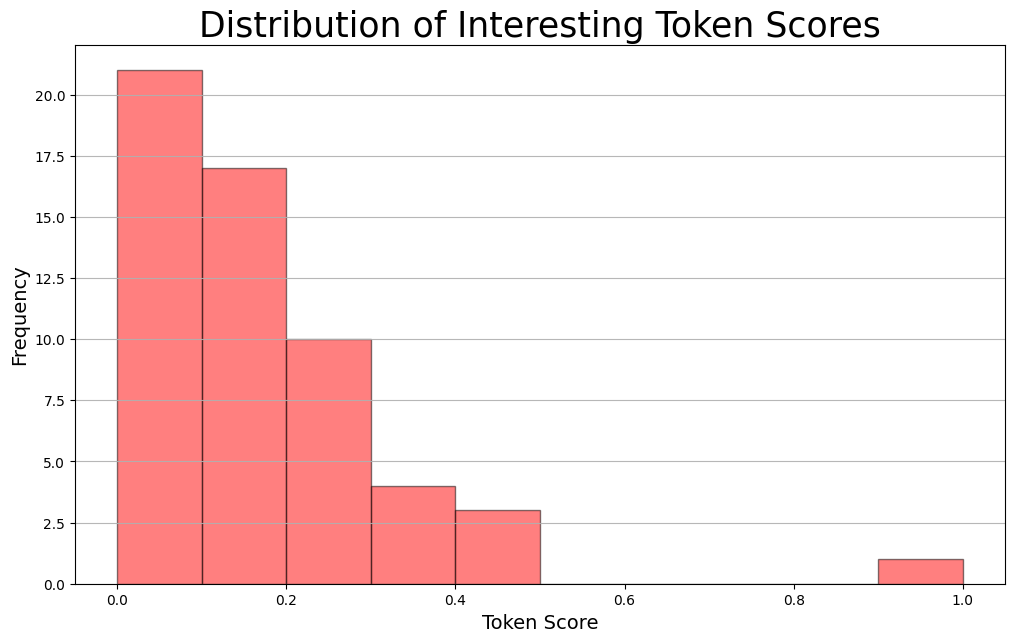

In [27]:
# Create an empty list to add scores of each sentence
token_scores = []

# Loop through each sentence in the article and calculate it's score then append
for sentence in doc.sents:
    token_score = score_sentence_by_token(sentence, interesting_tokens)
    token_scores.append(token_score)

# Plot the histogram of token scores
plt.figure(figsize=(12, 7))
plt.hist(token_scores, bins=10, edgecolor='black', color='red', alpha =0.5)

# Add titles and labels to the plot and add grid lines
plt.title('Distribution of Interesting Token Scores', fontsize=25)
plt.xlabel('Token Score', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', alpha = 0.9) 

# Credit for using a grid line just on one axis is thanks to Josiah Randleman
# https://github.com/jrandl/web-scraping/blob/master/web-scraping.ipynb

# Show the plot
plt.show()

# The most common range of scores is around 0.0 to 0.1 based on the histogram.

7. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

8. Which tokens and lexems would be ommitted from the lists generated in questions 3 and 4 if we only wanted to consider nouns as interesting words?  How might we change the code to only consider nouns? Put your answer in this Markdown cell (you can edit it by double clicking it).